In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import keras
import keras.utils
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-06-24 07:07:14.273580: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 07:07:14.273703: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 07:07:14.409615: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier


In [22]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearnex import patch_sklearn 
patch_sklearn()
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.metrics import AUC
import tensorflow.keras.backend as K

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.drop_duplicates()
df_class_0 =  df[df['Class']==0]
df_class_1 =  df[df['Class']==1]

y = df['Class']
X = df.drop(['Class'],axis = 1)
X = pd.DataFrame(StandardScaler().fit_transform(X),columns = X.columns,index = X.index )



INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


****Here first we drop all duplicate rows so as to save time in training useless data and avoid duplicate test cases in testing data which may improve f1 score wrongly. 
We seperate out output feature and input features.
Next we apply standardization to all features in overall data for faster training

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)
X_train.shape,X_test.shape
X_test.shape

(56962, 30)

We split our data before appling resampling.

In [14]:
def borderline_smote(X,Y):
    X_sm,Y_sm = BorderlineSMOTE().fit_resample(X,Y)
    print(Y.value_counts(),Y_sm.value_counts())
    return X_sm,Y_sm

In [16]:
X_sm,Y_sm = borderline_smote(X_train,y_train)
model = Sequential()
model.add(Dense(12,activation = "relu",input_shape = (30,)))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[AUC(curve='PR')])
model.fit(X_sm,Y_sm,epochs = 10,batch_size = 10)
y_pred = model.predict(X_test)

print(y_pred)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


Class
0    227447
1       398
Name: count, dtype: int64 Class
0    227447
1    227447
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
   96/45490 ━━━━━━━━━━━━━━━━━━━━ 1:12 2ms/step - auc_4: 0.9218 - loss: 0.5274 

W0000 00:00:1719213633.151422     469 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


45490/45490 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - auc_4: 0.9988 - loss: 0.0321
Epoch 2/10
45490/45490 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - auc_4: 0.9995 - loss: 0.0053
Epoch 3/10
45490/45490 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - auc_4: 0.9996 - loss: 0.0044
Epoch 4/10
45490/45490 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - auc_4: 0.9995 - loss: 0.0040
Epoch 5/10
45490/45490 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - auc_4: 0.9996 - loss: 0.0036
Epoch 6/10
45490/45490 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - auc_4: 0.9997 - loss: 0.0028
Epoch 7/10
45490/45490 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - auc_4: 0.9996 - loss: 0.0032
Epoch 8/10
45490/45490 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - auc_4: 0.9997 - loss: 0.0030
Epoch 9/10
45490/45490 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - auc_4: 0.9998 - loss: 0.0026
Epoch 10/10
45490/45490 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - auc_4: 0.9997 - loss: 0.0025
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[[9.9490528e-08]
 [1.4389472e-07]
 [1.5541653e-08]
 ...
 [2.8208862e-07]
 [4.1466709e-0

We apply borderline smote rather than SMOTE or ADASYN. This is because SMOTE has a problem with borderline and noisy data due to its implementation thus borderline smote and smotenn can fix this issue. I tried using smotenn however it gave errors. Also ensemble is slow.

In [20]:
y_prediction = (y_pred > 0.5).astype(int)
y_prediction
print(classification_report(y_test,y_prediction))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.76      0.78      0.77        94

    accuracy                           1.00     56962
   macro avg       0.88      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962



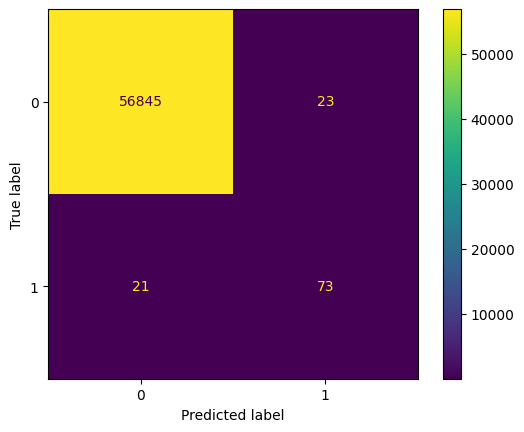

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, y_prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

For highly imbalanced data rather than using accuracy as a metric we use f1 score and PRAUC as proper metrics as they only take positive outcomes as seperate parameters independent of negative ones. I tried using other models for better scores however they took too much time to be useful in an actual application.